In [53]:
import sklearn
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pandas.read_csv("WineDataset.csv")

In [ ]:
print(row)

Title                           Yalumba 'Virgilius' Viognier 2017, Eden Valley
Description                  Yalumba's Virgilius is often regarded as Austr...
Price                                                        £34.99 per bottle
Capacity                                                                  75CL
Grape                                                                 Viognier
Secondary Grape Varieties                                                  NaN
Closure                                                               Screwcap
Country                                                              Australia
Unit                                                                      10.1
Characteristics                            Peach, Apricot, Floral, Honeysuckle
Per bottle / case / each                                            per bottle
Type                                                                     White
ABV                                                 

# Let's start with some basic, multiple linear regression

In [84]:
prices,vintages,abvs = [],[],[]
for i,row in df.iterrows():

    vintage = row.Vintage
    price = row.Price
    abv = row.ABV
    if str(vintage).isnumeric() and " per bottle" in price:
        vintages.append(int(vintage))
        price = float(price.split(" per bottle")[0][1:])
        prices.append(price)
        abvs.append(float(abv[4:-1]))

prices,vintages,abvs = np.array(prices), np.array(vintages), np.array(abvs)

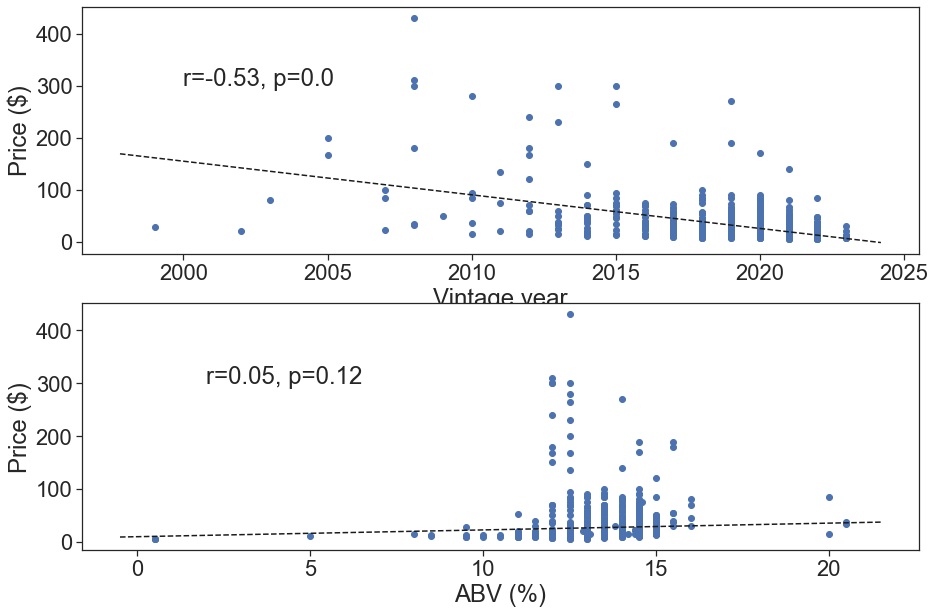

In [94]:
from scipy.stats import linregress
sns.set(style="ticks", font_scale=2)
f,axarr = plt.subplots(2,1)

ax = axarr[0]
ax.scatter(vintages, prices)
ax.set_ylabel("Price ($)")
ax.set_xlabel("Vintage year")

linfit = linregress(vintages, prices)
x = np.array(ax.get_xlim())
ax.plot(x, x*linfit.slope + linfit.intercept, linestyle="--", color="k")
ax.text(2000, 300, f"r={np.round(linfit.rvalue,2)}, p={np.round(linfit.pvalue,2)}")

ax = axarr[1]
ax.scatter(abvs, prices)
ax.set_ylabel("Price ($)")
ax.set_xlabel("ABV (%)")

linfit = linregress(abvs, prices)
x = np.array(ax.get_xlim())
ax.plot(x, x*linfit.slope + linfit.intercept, linestyle="--", color="k")
ax.text(2, 300, f"r={np.round(linfit.rvalue,2)}, p={np.round(linfit.pvalue,2)}")

f.set_size_inches(15,10)

0.281547718314757
[-6.52947705 -1.02819026] 13229.17339696351


Text(25, 400, 'r=0.53')

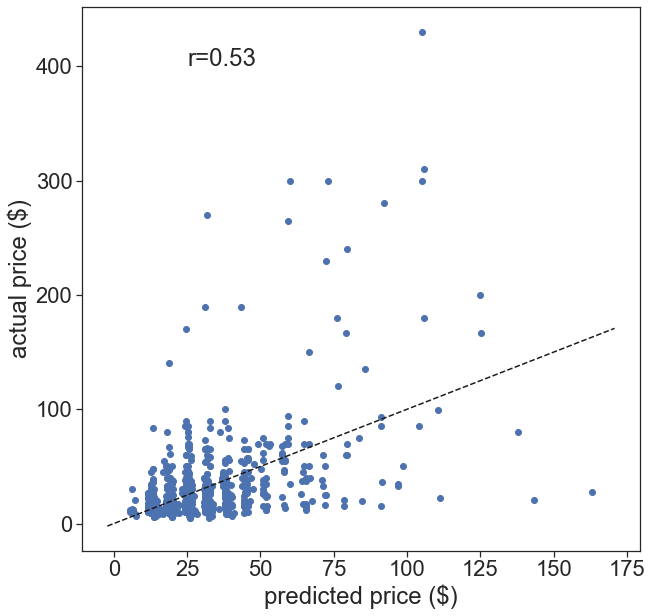

In [117]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
X = np.array([vintages, abvs]).transpose()
y = prices
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_, reg.intercept_)

f,ax = plt.subplots(1,1)
ax.scatter(reg.predict(X), y)

ax.set_xlabel("predicted price ($)")
ax.set_ylabel("actual price ($)")
x = np.array(ax.get_xlim())
ax.plot(x,x, linestyle="--", color="k")
f.set_size_inches(10,10)

ax.text(25, 400, f"r={np.round(pearsonr(reg.predict(X), y)[0],2)}")